# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Dataset

In [2]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploration and Preprocessing

In [3]:
df.shape


(418, 12)

In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# df['Age'].filln(df['Age'].median() , inplave = True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [16]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace = True)
df['Cabin']

0      B57 B59 B63 B66
1      B57 B59 B63 B66
2      B57 B59 B63 B66
3      B57 B59 B63 B66
4      B57 B59 B63 B66
            ...       
413    B57 B59 B63 B66
414               C105
415    B57 B59 B63 B66
416    B57 B59 B63 B66
417    B57 B59 B63 B66
Name: Cabin, Length: 418, dtype: object

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [19]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [20]:
df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1 , inplace = True)

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [24]:
df.shape

(418, 8)

# Encoding Categorical Values

In [27]:
label_encoders={}
#encode categorical variables
for col in ['Sex','Embarked']:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le


In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,27.0,0,0,8.0500,2


# Data Visulaization

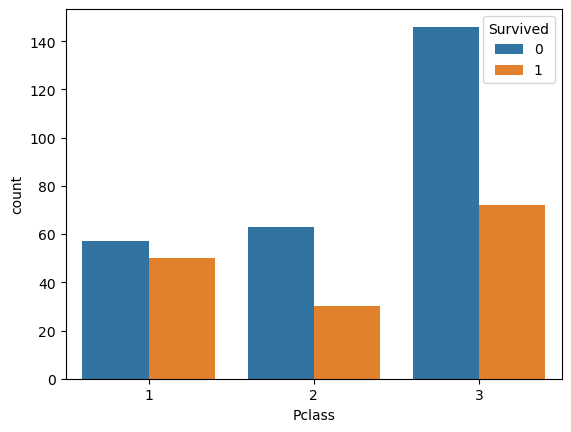

In [29]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

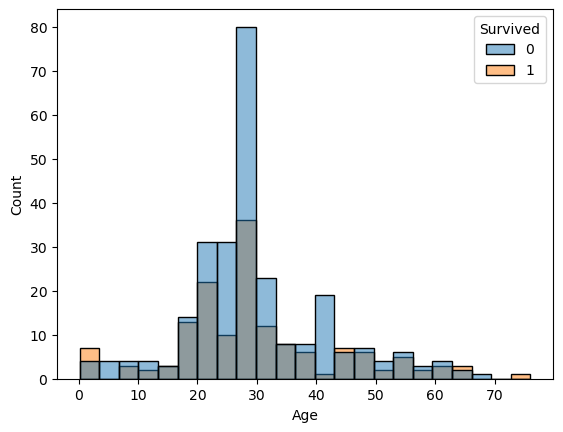

In [33]:
sns.histplot(data=df, x='Age' , hue = 'Survived')
plt.show()

# Split Data into Training and Testing set

In [34]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [38]:
train_x,test_x,train_y,test_y=train_test_split(X,Y , test_size=0.2 , random_state=42)

# Train ML model

In [39]:
c=RandomForestClassifier(random_state=42)
c.fit(train_x,train_y)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [40]:
y_pred=c.predict(test_x)

In [41]:
accuracy=accuracy_score(test_y,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print(classification_report(test_y,y_pred))

Accuracy:1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Dummy Data for testing

In [50]:
new_passanger=pd.DataFrame({'Pclass':[3],
                           'Sex':['female'],
                            'Age':[25],
                           'SibSp':[0],
                           'Parch':[0],
                           'Fare':[7.75],
                           'Embarked':['S']})
for col in ['Sex','Embarked']:
    le=LabelEncoder()
    new_passanger[col]=le.fit_transform(new_passanger[col])
prediction=c.predict(new_passanger)
print(f"Predicted Survival:{'Survived' if prediction[0]==1 else 'Not Survived'}")

Predicted Survival:Survived


# The End